# ESCUELA POLITÉCNICA NACIONAL

![](logoEpn.jpg){width=3cm height=3cm fig-align="center"}

# Taller N°3: Series de Taylor y Polinomios de Lagrange

## Grafique las curvas de las series de Taylor de varios órdenes para los siguientes casos:

### $cos(x),x_0=0$

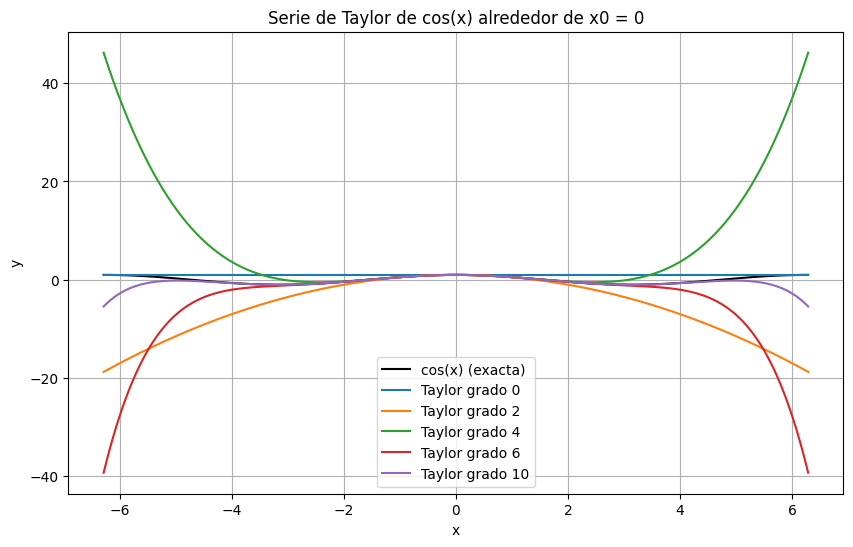

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, pi

# Función para la serie de Taylor de cos(x)
def taylor_cos(x, order):
    s = np.zeros_like(x, dtype=float)
    k = 0
    while 2*k <= order:
        s += ((-1)**k) * x**(2*k) / factorial(2*k)
        k += 1
    return s

# Valores de x y función exacta
x = np.linspace(-2*pi, 2*pi, 1000)
y_exact = np.cos(x)

# Órdenes de aproximación
orders = [0, 2, 4, 6, 10]

# Gráfica
plt.figure(figsize=(10,6))
plt.plot(x, y_exact, 'k', label="cos(x) (exacta)")
for n in orders:
    plt.plot(x, taylor_cos(x, n), label=f"Taylor grado {n}")
plt.title("Serie de Taylor de cos(x) alrededor de x0 = 0")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### $\frac{1}{1-x}$

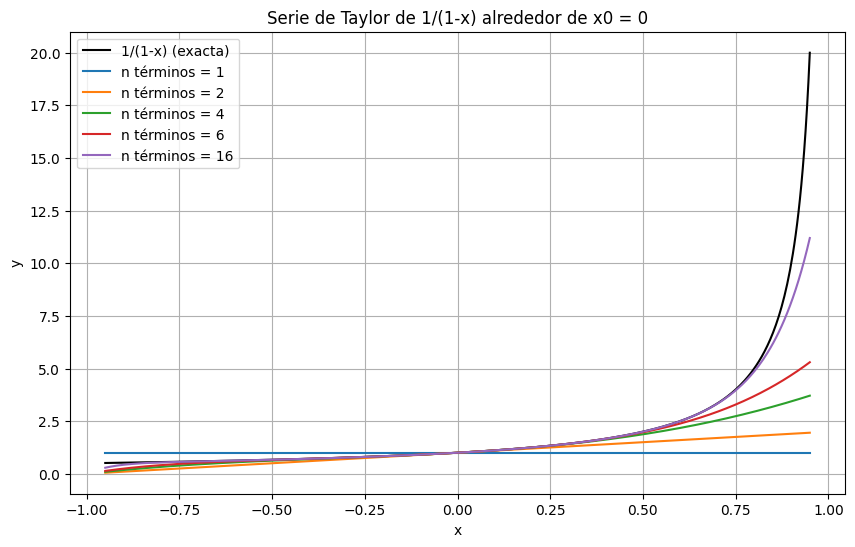

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_geom(x, order):
    s = np.zeros_like(x, dtype=float)
    for n in range(order+1):
        s += x**n
    return s

x = np.linspace(-0.95, 0.95, 500)
y_exact = 1 / (1 - x)

orders = [0, 1, 3, 5, 15]

plt.figure(figsize=(10,6))
plt.plot(x, y_exact, 'k', label="1/(1-x) (exacta)")
for n in orders:
    plt.plot(x, taylor_geom(x, n), label=f"n términos = {n+1}")
plt.title("Serie de Taylor de 1/(1-x) alrededor de x0 = 0")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### $ln(x),x_0=1$

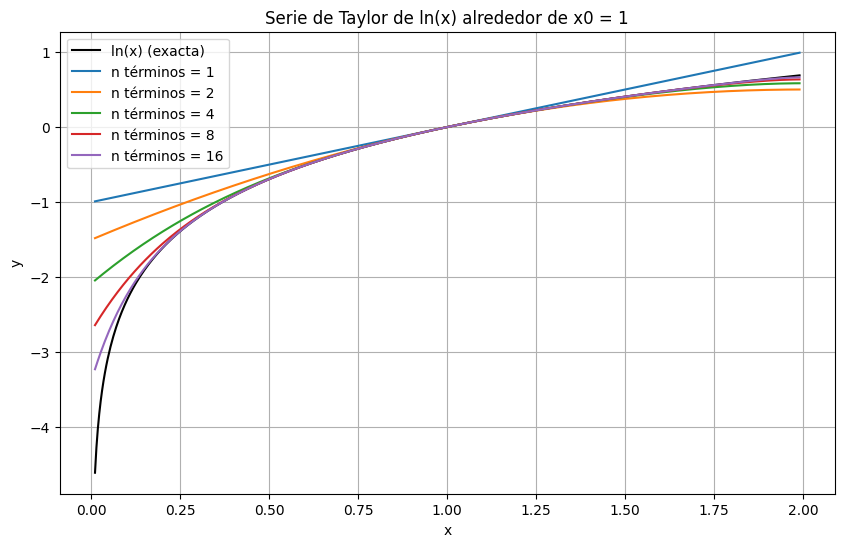

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_ln(x, order):
    h = x - 1
    s = np.zeros_like(x, dtype=float)
    for n in range(1, order+1):
        s += ((-1)**(n+1)) * h**n / n
    return s

x = np.linspace(0.01, 1.99, 500)
y_exact = np.log(x)

orders = [1, 2, 4, 8, 16]

plt.figure(figsize=(10,6))
plt.plot(x, y_exact, 'k', label="ln(x) (exacta)")
for n in orders:
    plt.plot(x, taylor_ln(x, n), label=f"n términos = {n}")
plt.title("Serie de Taylor de ln(x) alrededor de x0 = 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Encuentre el polinomio de Lagrange para los siguientes datos y grafique:

### $(0,0), (30,0.5), (60,\frac{\sqrt{3}}{2}), (90,1)$

Polinomio de Lagrange (forma expandida):
      3      3        2       2              
  √3⋅x      x      7⋅x    √3⋅x    √3⋅x   11⋅x
- ────── + ───── - ──── + ───── - ──── + ────
  108000   64800   3600    900     40    180 

Polinomio simplificado:
  ⎛        2      2                                     ⎞
x⋅⎝- 3⋅√3⋅x  + 5⋅x  - 630⋅x + 360⋅√3⋅x - 8100⋅√3 + 19800⎠
─────────────────────────────────────────────────────────
                         324000                          


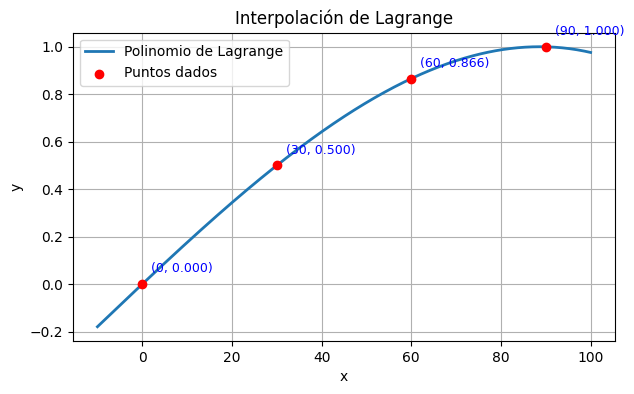

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variable simbólica
x = sp.Symbol('x')

# Datos del problema
puntos = [(0, 0), (30, sp.Rational(1,2)), (60, sp.sqrt(3)/2), (90, 1)]

# Polinomio de Lagrange
P = sp.interpolate(puntos, x)
P_simpl = sp.simplify(P)

# Mostrar el polinomio
print("Polinomio de Lagrange (forma expandida):")
sp.pprint(sp.expand(P_simpl))
print("\nPolinomio simplificado:")
sp.pprint(P_simpl)

# Crear función numérica para graficar
f = sp.lambdify(x, P_simpl, modules=['numpy'])

# Rango para graficar
x_vals = np.linspace(-10, 100, 400)
y_vals = f(x_vals)

# Graficar
plt.figure(figsize=(7,4))
plt.plot(x_vals, y_vals, label='Polinomio de Lagrange', linewidth=2)
plt.scatter([p[0] for p in puntos], [float(p[1]) for p in puntos],
            color='red', label='Puntos dados', zorder=5)

# Etiquetas de los puntos
for px, py in puntos:
    plt.text(px + 2, float(py) + 0.05,  # posición (ligeramente desplazada)
             f"({px}, {float(py):.3f})",  # texto: coordenadas con 3 decimales
             fontsize=9, color='blue')

# Título y etiquetas
plt.title('Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### $(1,1), (2,2), (3,2)$

Polinomio de Lagrange (forma expandida):
   2          
  x    5⋅x    
- ── + ─── - 1
  2     2     

Polinomio simplificado:
   2          
  x    5⋅x    
- ── + ─── - 1
  2     2     


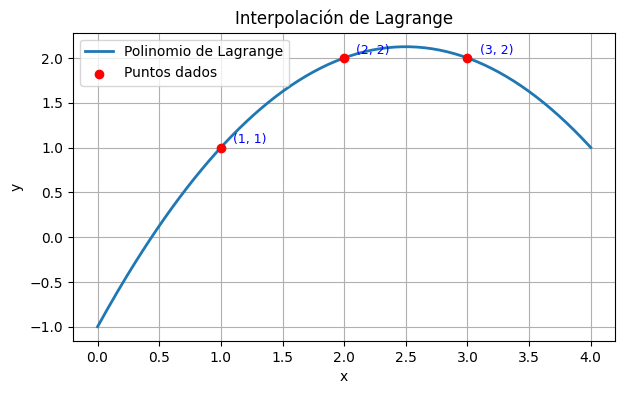

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variable simbólica
x = sp.Symbol('x')

# Datos del ejercicio
puntos = [(1,1), (2,2), (3,2)]

# Polinomio de Lagrange
P = sp.interpolate(puntos, x)
P_simpl = sp.simplify(P)

# Mostrar el polinomio
print("Polinomio de Lagrange (forma expandida):")
sp.pprint(sp.expand(P_simpl))
print("\nPolinomio simplificado:")
sp.pprint(P_simpl)

# Convertimos el polinomio a función numérica
f = sp.lambdify(x, P_simpl, modules=['numpy'])

# Rango para graficar
x_vals = np.linspace(0, 4, 200)
y_vals = f(x_vals)

# Graficar
plt.figure(figsize=(7,4))
plt.plot(x_vals, y_vals, label='Polinomio de Lagrange', linewidth=2)
plt.scatter([p[0] for p in puntos], [p[1] for p in puntos],
            color='red', label='Puntos dados', zorder=5)

# Coordenadas de cada punto
for px, py in puntos:
    plt.text(px + 0.1, py + 0.05, f"({px}, {py})", fontsize=9, color='blue')

# Título y etiquetas
plt.title('Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### $(−2,5), (1,7), (3,11), (7,34)$

Polinomio de Lagrange (forma expandida):
    3        2               
43⋅x    101⋅x    793⋅x   1087
───── + ────── + ───── + ────
1080     540     1080    180 

Polinomio simplificado:
    3        2               
43⋅x    101⋅x    793⋅x   1087
───── + ────── + ───── + ────
1080     540     1080    180 


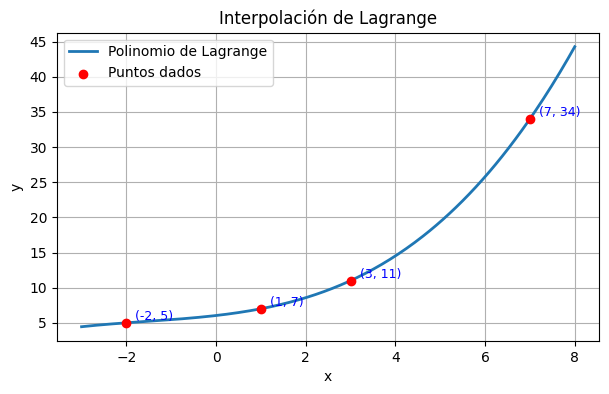

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variable simbólica
x = sp.Symbol('x')

# Datos del ejercicio
puntos = [(-2,5), (1,7), (3,11), (7,34)]

# Polinomio de Lagrange
P = sp.interpolate(puntos, x)
P_simpl = sp.simplify(P)

# Mostrar el polinomio
print("Polinomio de Lagrange (forma expandida):")
sp.pprint(sp.expand(P_simpl))
print("\nPolinomio simplificado:")
sp.pprint(P_simpl)

# Convertimos el polinomio a función numérica
f = sp.lambdify(x, P_simpl, modules=['numpy'])

# Rango para graficar
x_vals = np.linspace(-3, 8, 300)
y_vals = f(x_vals)

# Graficar
plt.figure(figsize=(7,4))
plt.plot(x_vals, y_vals, label='Polinomio de Lagrange', linewidth=2)
plt.scatter([p[0] for p in puntos], [p[1] for p in puntos],
            color='red', label='Puntos dados', zorder=5)

# Coordenadas de cada punto
for px, py in puntos:
    plt.text(px + 0.2, py + 0.4, f"({px}, {py})", fontsize=9, color='blue')

# Título y etiquetas
plt.title('Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Link del repositorio GitHub

[github_TamyBenavidez](https://github.com/TamyBenavidez/MN/tree/main/Taller/Taller03), Taller N°3